In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## Novo Dataset

In [29]:
df = pd.read_csv('student-data.csv')  
df['passed'] = df['passed'].map({'yes': 1, 'no': 0})
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['sex'] = df['sex'].map({'F': 1, 'M': 0})
df['address'] = df['address'].map({'R': 1, 'U': 0})
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['Mjob', 'Fjob'], drop_first=True)
df = pd.get_dummies(df, columns=['reason'], drop_first=True)
df = pd.get_dummies(df, columns=['guardian'], drop_first=True)
df = df.replace({True: 1, False: 0})
df


/var/folders/zy/_f0r2g0x4vv0wz7vz2fnln300000gn/T/ipykernel_31523/617921335.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,1,18,0,1,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,1,1,17,0,1,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,1,1,15,0,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,1,1,15,0,1,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,1,1,16,0,1,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,0,0,0,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,0,0,17,0,0,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
392,0,0,21,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
393,0,0,18,1,0,1,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0


## Nova Correlation Matrix

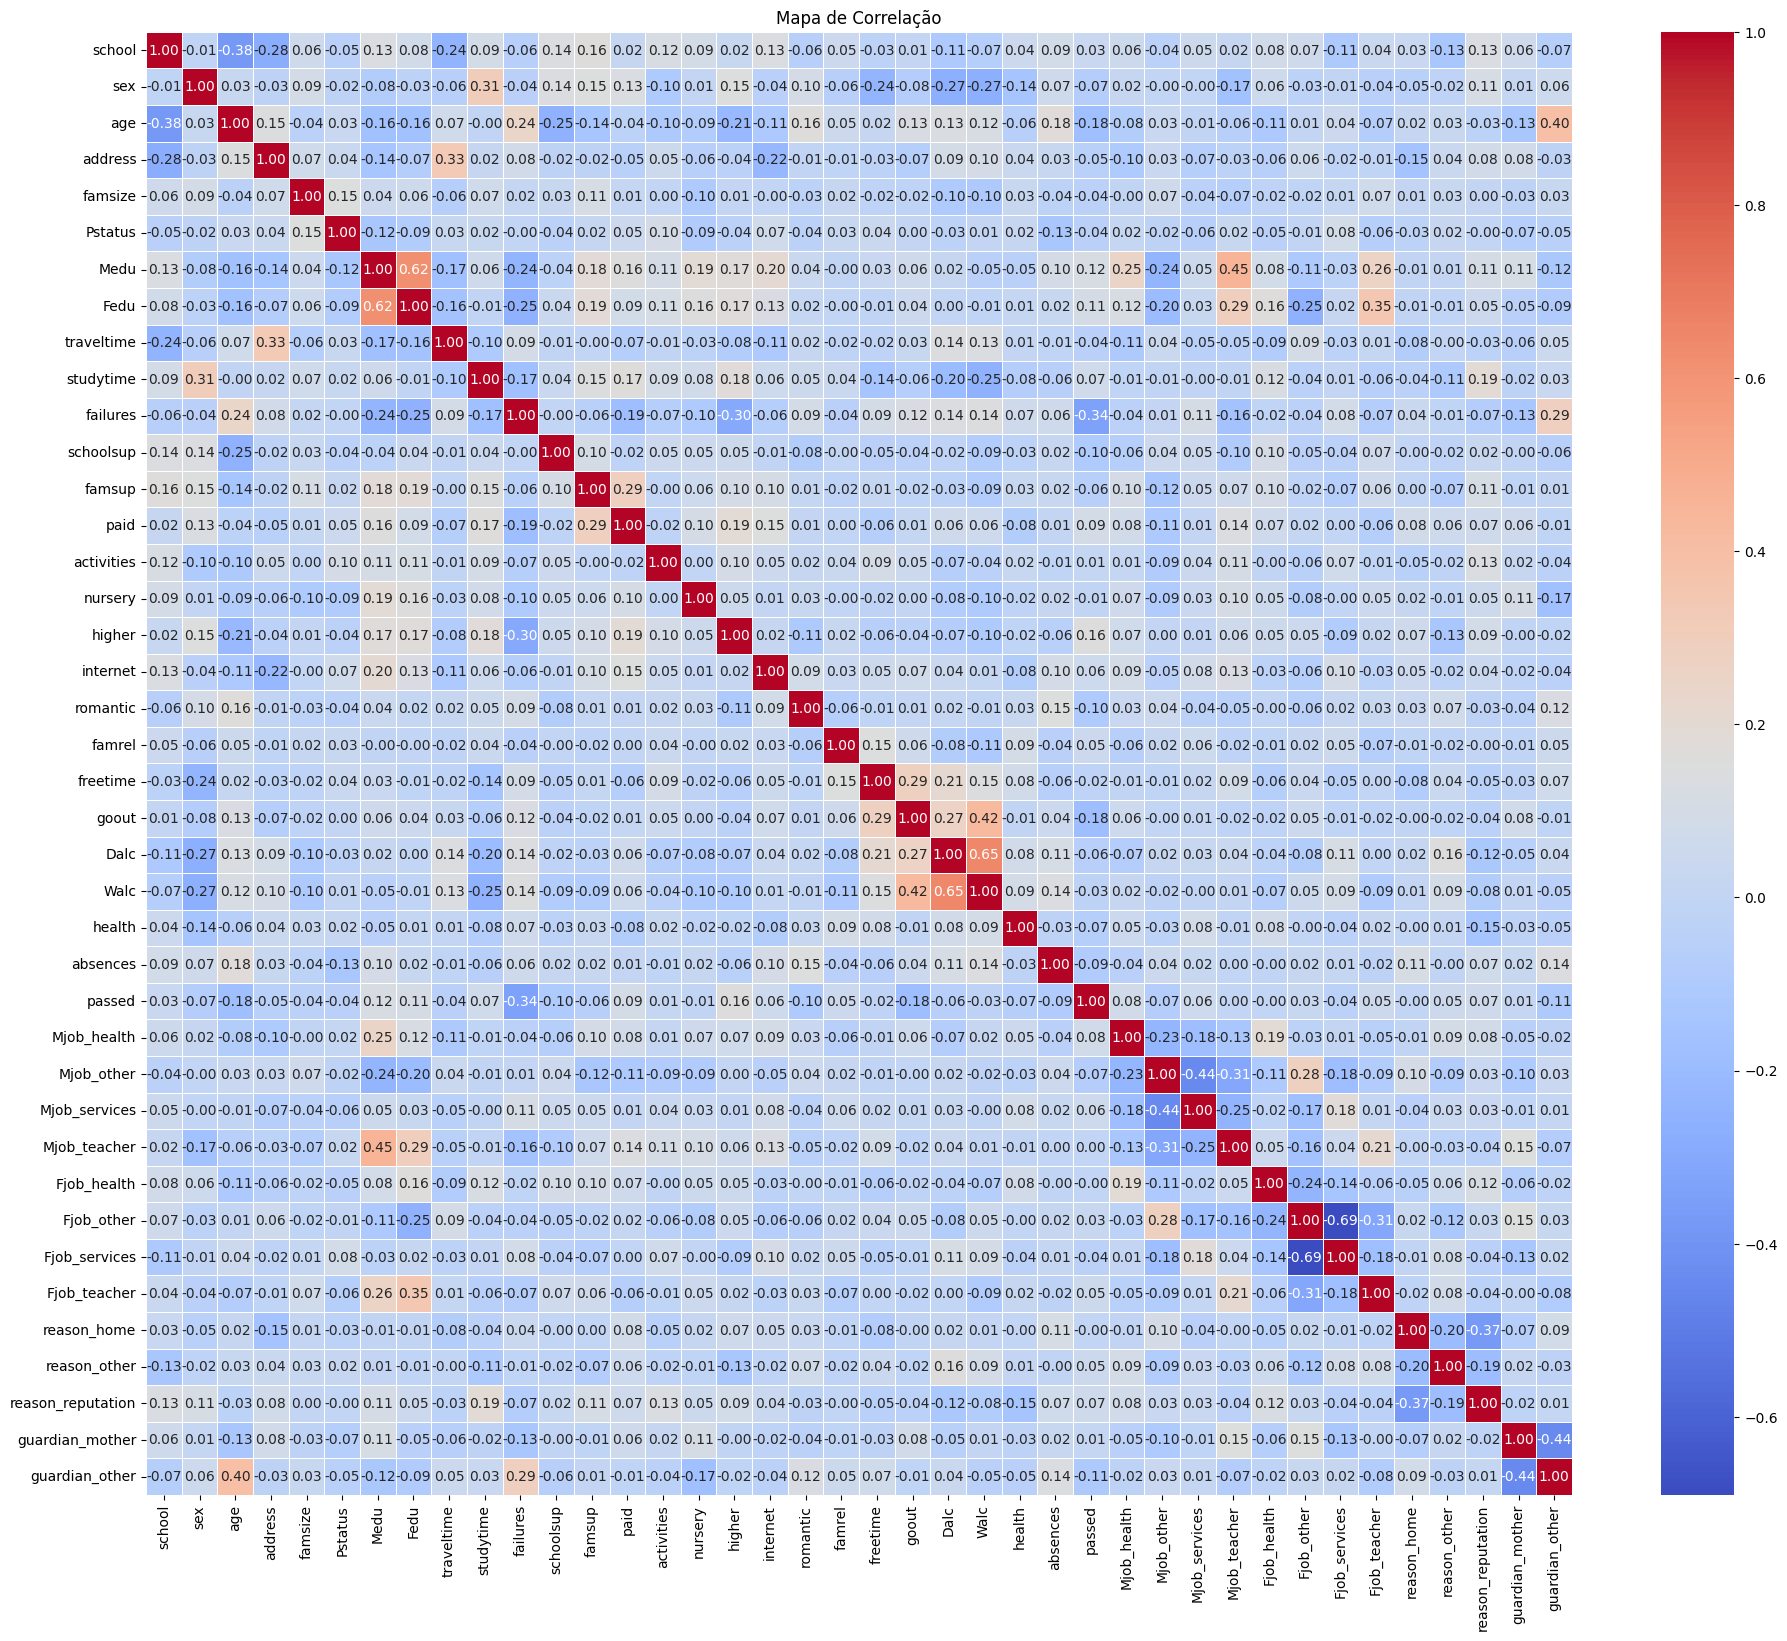

In [30]:
# Calcula a correlação entre as variáveis numéricas e a feature 'passed'
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Faz um mapa de calor para visualizar as correlações
plt.figure(figsize=(23, 19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

In [32]:
# Filtra as features que têm uma correlação maior que 0.1 com a variável 'passed'
correlated_features = correlation_matrix['passed'][correlation_matrix['passed'].abs() >= 0.1]
print(correlated_features)

age              -0.179645
Medu              0.115396
Fedu              0.108057
failures         -0.337731
higher            0.157708
goout            -0.183399
passed            1.000000
guardian_other   -0.107977
Name: passed, dtype: float64
